Distance to line(left): 1.6955100822242166 m
[25.21, 0.66, 25.198991424505184, 2.3554743437131527, 1.6955100822242166]


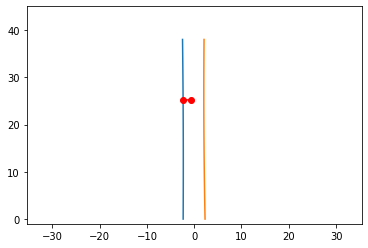

In [22]:
import numpy as np
import shapely.geometry as geom
from shapely.geometry import Point
import matplotlib.pyplot as plt

class NearestPoint(object):
    def __init__(self, left_line, right_line, ax):
        self.left_line = left_line
        self.right_line = right_line
        self.ax = ax
        ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, xy_point, side, point_on_lane):
        assert side == 'left' or side == 'right', 'Type among left or right'
        distance = self.left_line.distance(xy_point)
        print(f'Distance to line({side}):', distance, 'm')
        
        instant_resultList = [point_on_lane.y, -point_on_lane.x, distance]
        return instant_resultList
            
    def draw_segment(self, object_list):
        resultList = []
        objectList = []
        # determine the points whether those are at the left side or right side.
        for i in object_list:
            if i[0] <= 0:
                left_point_list.append(Point(i[0], i[1]))
            else:
                right_point_list.append(Point(i[0], i[1]))
        # Draw the lateral lane about the left objects
        for point in left_point_list:
            point_on_line = self.left_line.interpolate(self.left_line.project(point))
            self.ax.plot([point.x, point_on_line.x], [point.y, point_on_line.y], 
                     color='red', marker='o', scalex=False, scaley=False)
            fig.canvas.draw()
            # get the distance in meter unit
            resultList = resultList + [point.y, -point.x] + self.__call__(point, 'left', point_on_line)
        # Draw the lateral lane about the right objects
        for point in right_point_list:
            point_on_line = self.right_line.interpolate(self.right_line.project(point))
            self.ax.plot([point.x, point_on_line.x], [point.y, point_on_line.y], 
                     color='red', marker='o', scalex=False, scaley=False)
            fig.canvas.draw()
            # get the distance in meter unit
            resultList = resultList + [point.y, -point.x] + self.__call__(point, 'right', point_on_line)
        
        return resultList


if __name__ == '__main__':
    # get the path of 3D points on lanes
    l_coords = np.loadtxt('/home/kaai/chicago_ws/src/CSV_Communication/left_lane.txt')
    r_coords = np.loadtxt('/home/kaai/chicago_ws/src/CSV_Communication/right_lane.txt')
    left_line = geom.LineString(l_coords)
    right_line = geom.LineString(r_coords)
    
    # define object locations
    object_list = [[-0.66, 25.21],[-7.22, 38.47], [-4.43, 50.24]]
    left_point_list = []
    right_point_list = []
    max_point = float(l_coords[l_coords.shape[0] - 1][1]) # indicate the maximum value from lane equation
    # remove the object point which has bigger value than the maximum point
    for i in range(len(object_list)):
        if object_list[i][1] > max_point:
            del object_list[i:]
            break

    # Plotting Section
    fig, ax = plt.subplots()
    ax.plot(*l_coords.T)
    ax.plot(*r_coords.T)
    ax.axis('equal')
    # Set the frame
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1, 45)
    
    # Make the class
    distance_class = NearestPoint(left_line, right_line, ax)
    # result = [x_value_on_lane, y_value_on_lane, distance]
    result = distance_class.draw_segment(object_list)
    
    print(result)
    
    plt.show()

In [2]:
import numpy as np

prac_l = np.loadtxt('/home/kaai/chicago_ws/src/CSV_Communication/left_lane.txt')
prac_r = np.loadtxt('/home/kaai/chicago_ws/src/CSV_Communication/right_lane.txt')

In [8]:
left_lane_equat_point_x = []
left_lane_equat_point_y = []
right_lane_equat_point_x = []
right_lane_equat_point_y = []

for i in prac_l:
    left_lane_equat_point_x.append(i[1])
    left_lane_equat_point_y.append(-i[0])
for i in prac_r:
    right_lane_equat_point_x.append(i[1])
    right_lane_equat_point_y.append(-i[0])
    
print(left_lane_equat_point_x)
print(left_lane_equat_point_y)
print(right_lane_equat_point_x)
print(right_lane_equat_point_y)
        

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0]
[2.3410404240722698, 2.336057875721889, 2.3315343460163223, 2.3274698349555694, 2.3238643425396304, 2.3207178687685053, 2.3180304136421936, 2.3158019771606964, 2.314032559324013, 2.312722160132143, 2.311870779585087, 2.311478417682845, 2.311545074425417, 2.312070749812803, 2.3130554438450024, 2.3144991565220154, 2.316401887843843, 2.318763637810484, 2.321584406421939, 2.324864193678208, 2.3286029995792905, 2.3328008241251874, 2.3374576673158978, 2.342573529151422, 2.34814840963176, 2.3541823087569123, 2.3606752265268782, 2.3676271629416576, 2.3750381180012514, 2.382908091705659, 2.3912370840548802, 2.4000250950489153, 2.4092721246877646, 2.4189781729714275, 2.429143239899904, 2.439767325473195, 2.4508504296912994, 2.462392552554218, 2.47439369406195]
[0.0, 1.0, 2.0